In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
from analsis.analsis_utils.utils import get_all_num_features_results
from analsis.analsis_utils.plot_utils import plot_all_num_features_models, plot_loss_and_r2s_for_selected_feature_numbers, \
    plot_num_features_vs_r2, plot_bar_plot_of_used_features, plot_r2_vs_num_features

In [3]:

COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f']
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
plots_folder = f'{local_base_path}/plots/digits_lightgbm_feature_selection'
path = '/Volumes/noamaz/modularity/teach_archs/digits/digits_lightgbm_feature_selection/exp_2023-07-01-10-52-11'

path = '/Volumes/noamaz/modularity/teach_archs/digits/digits_lightgbm_feature_selection/exp_2023-07-01-10-52-11'

feature_selection = pd.read_csv(f'{path}/2023-07-06-11-28-10_feature_selection.csv')
used_features_csv_path = f'{path}/2023-07-06-11-28-10_used_features.csv'


In [4]:
model_name = 'lightgbm'
task = 'digits'
time_str =  dt.now().strftime("%Y-%m-%d-%H-%M-%S")

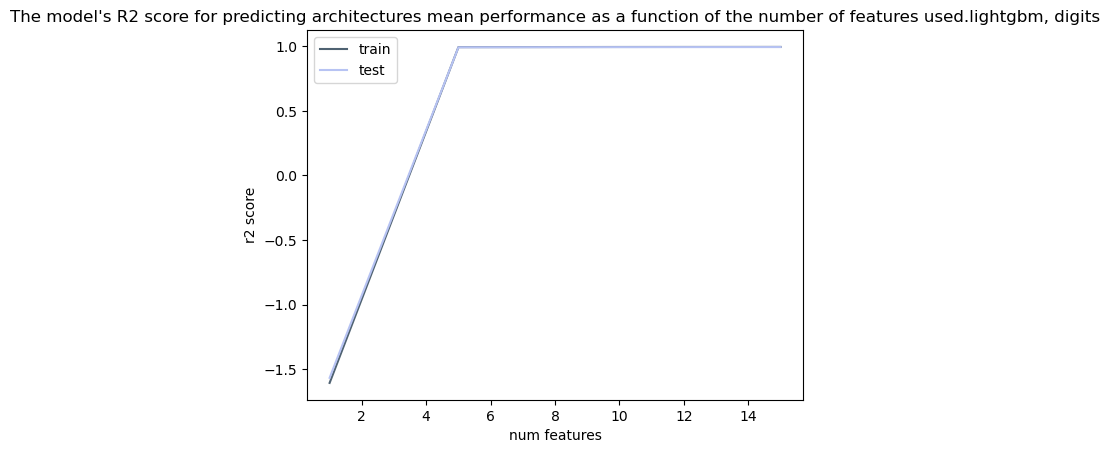

In [21]:
start_of_feature_selection = feature_selection[feature_selection['num_features'] < 20]
plt.plot(start_of_feature_selection['num_features'], start_of_feature_selection['train_r2'], label='train', c=COLORS[0])
plt.plot(start_of_feature_selection['num_features'], start_of_feature_selection['test_r2'], label='test', c=COLORS[1])
plt.xlabel('num features')
plt.ylabel('r2 score')
plt.title(
            f"The model's R2 score for predicting architectures mean performance as a function of the number of features used.{model_name}, {task}",
            wrap=True,
        )
plt.legend()
plt.savefig(
            f"{plots_folder}/{time_str}_{task}_r2_vs_num_features_{model_name}_regression_feature_selection.png")
plt.show()


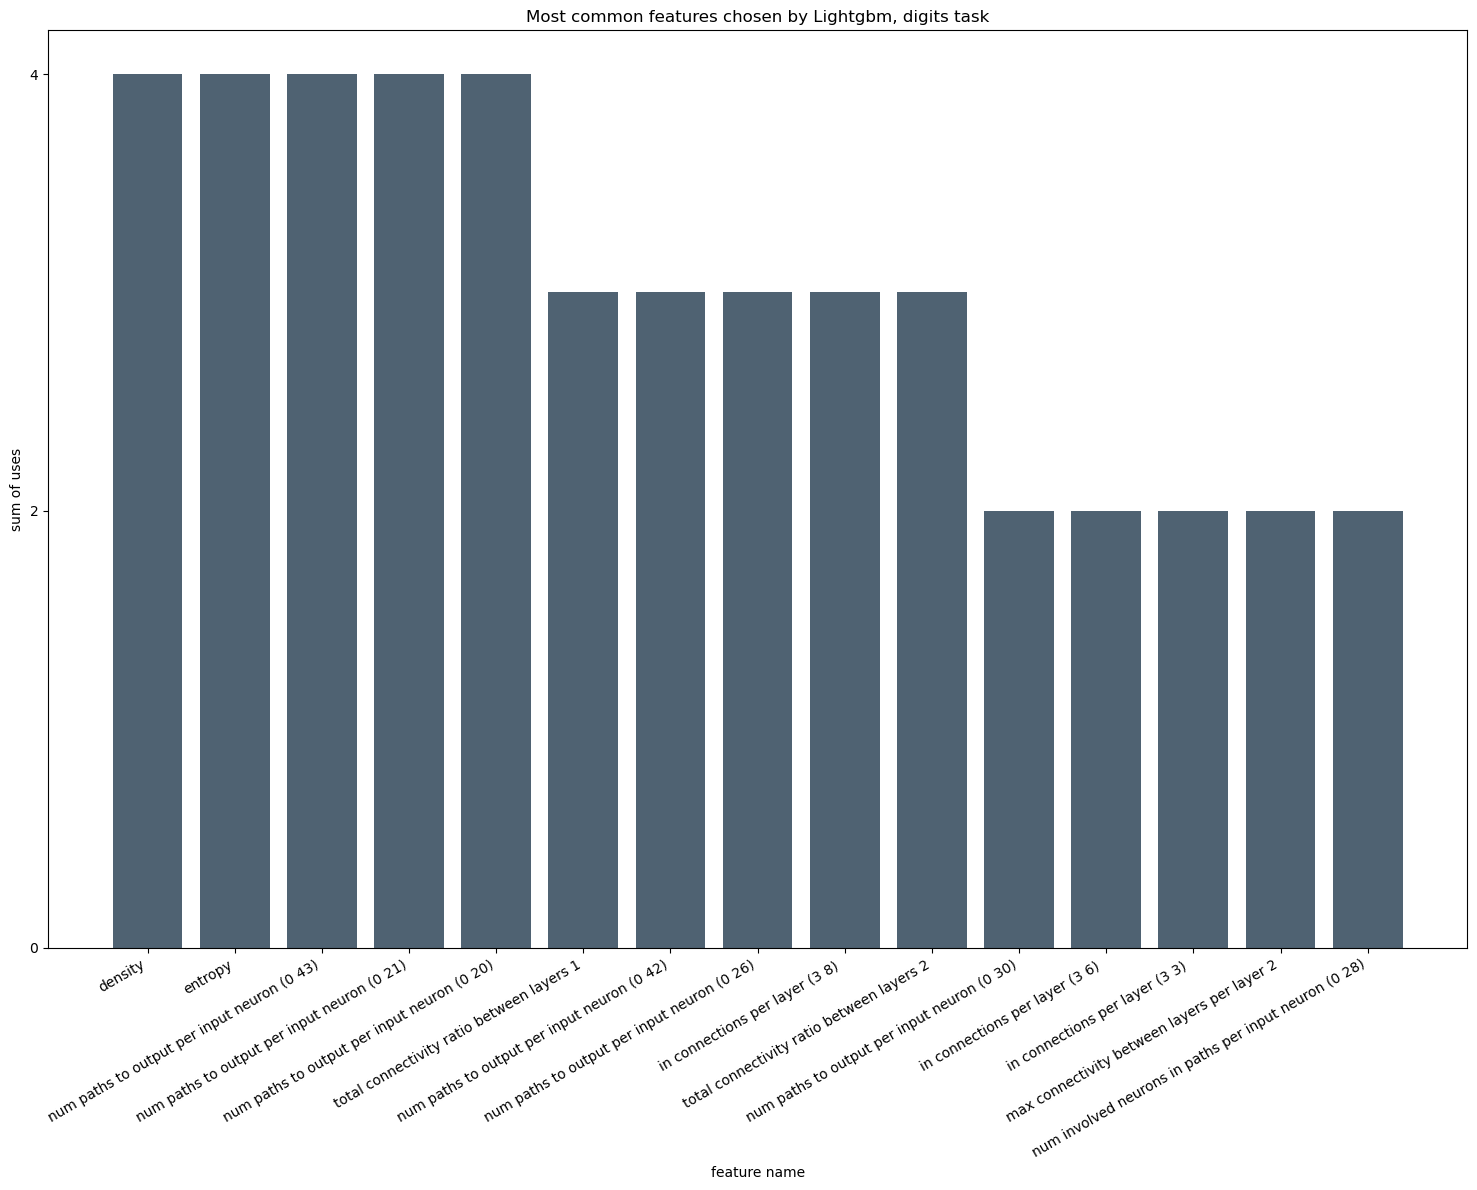

In [22]:
used_features_csv_path = f'{path}/partial_csvs/2023-07-03-14-45-23_5_20_used_features.csv'
used_features_df = pd.read_csv(used_features_csv_path).drop("Unnamed: 0", axis=1).rename(
    columns={'connectivity_ratio': 'density'})
sum_uses = used_features_df.sum().sort_index().sort_values(ascending=False)
cut = 15
is_top = True
plot_bar_plot_of_used_features(
    sum_uses=sum_uses,
    cut=cut,
    fig_out_folder='digits_lightgbm_feature_selection',
    local_base_path=local_base_path,
    time_str=time_str,
    task=task,
    is_top=is_top,
)

In [10]:
exp_name = 'exp_2023-04-25-12-22-31'
res_folder = f"{path}/teach_archs_regression_feature_selection_results/2023-07-01-10-52-11_500_eph"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
fig_out_folder = f"retina_lightgbm_feature_selection/{exp_name}"
lr = 0.001
start_idx = 200
end_idx = 1000
all_results_dict, res_df_200_1000 = get_all_num_features_results(
    res_folder=res_folder,
    start_idx=start_idx,
    end_idx=end_idx
)

TypeError: string indices must be integers

In [14]:
start_of_feature_selection = res_df_200_1000[res_df_200_1000['num_features'] < 20]
start_of_feature_selection

,num_features,mean_train_r2,mean_test_r2,max_train_r2,max_test_r2
2,1,-0.001931,-0.003706,0.003548,0.003552
4,5,0.983383,0.980902,0.989067,0.988989
0,10,0.985458,0.980731,0.996172,0.991596
3,15,0.985927,0.980232,0.993992,0.987767


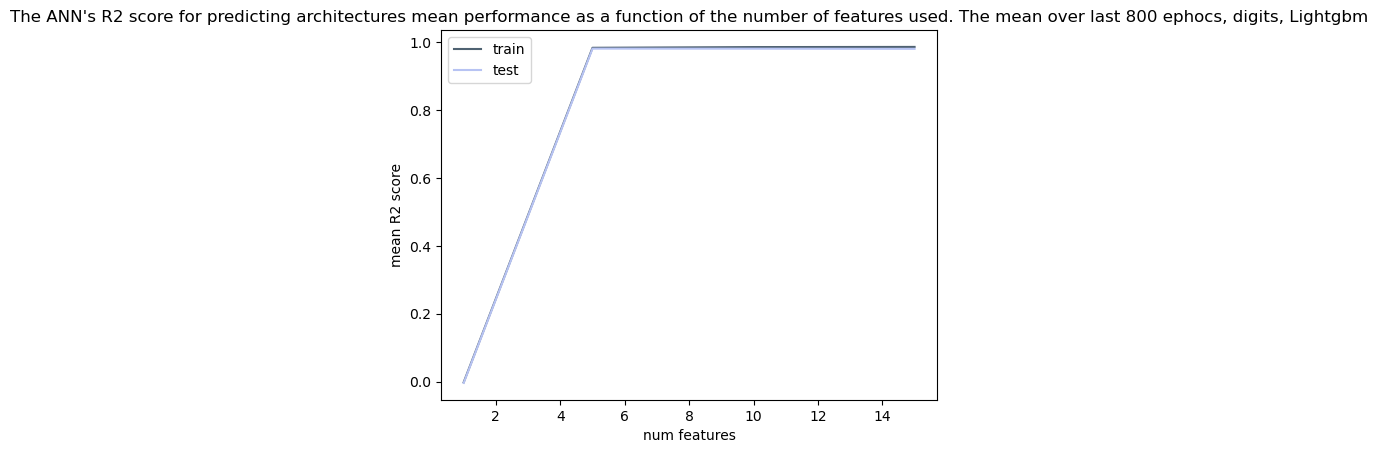

In [17]:
plot_num_features_vs_r2(
    res_df=start_of_feature_selection,
    r2_param='mean',
    fig_out_folder=fig_out_folder,
    local_base_path=local_base_path,
    time_str=time_str,
    task=task,
    additional_data_txt=f'last_{end_idx-start_idx}_ephocs',
)

,num_features,mean_train_r2,mean_test_r2,max_train_r2,max_test_r2
2,1,-0.001931,-0.003706,0.003548,0.003552
4,5,0.983383,0.980902,0.989067,0.988989
0,10,0.985458,0.980731,0.996172,0.991596
3,15,0.985927,0.980232,0.993992,0.987767
5,20,0.986442,0.977265,0.994926,0.986537
1,50,0.996156,0.987405,0.998783,0.990119
